In [1]:
## Importação de Bibliotecas
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
heartDf = pd.read_csv('./heart.csv')
heartDf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
renamedHeartDf = heartDf.rename(columns={
  "cp": "chestPain", 
  "trtbps": "restingBloodPressure",
  "chol": "cholesterol",
  "fbs": "fastingBloodSugar",
  "restecg": "restEcg",
  "thalachh": "maxHeartRateAchieved",
  "exng": "exerciceInducedAngina",
  "oldpeak": "stDepression",
  "slp": "stSegmentSlope",
  "caa": "majorVesselsNum",
  "thall": "thalassemia",
  "output": "heartDisease"
})
targetResults = renamedHeartDf.heartDisease

renamedHeartDf.drop("heartDisease", axis=1, inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
  renamedHeartDf,
  targetResults,
  random_state=1, 
  test_size=0.2
)
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,activations,training_accuracy,test_accuracy
0,identity,0.851240,0.754098
1,logistic,0.747934,0.770492
2,tanh,0.892562,0.786885
3,relu,0.842975,0.770492


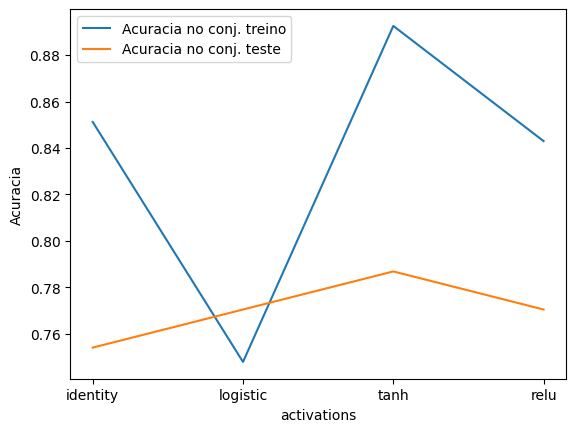

In [16]:
training_accuracy = []
test_accuracy = []

activations = ['identity', 'logistic', 'tanh', 'relu']

for activation in activations:
  mlp = MLPClassifier(
    hidden_layer_sizes=(8, 2),
    activation=activation,
    random_state=1,
  ).fit(X_trainscaled, y_train)
  training_accuracy.append(mlp.score(X_trainscaled, y_train))
  test_accuracy.append(mlp.score(X_testscaled, y_test))

plt.plot(activations, training_accuracy, label='Acuracia no conj. treino')
plt.plot(activations, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('activations')
plt.legend()

pd.DataFrame({"activations": activations, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,solvers,training_accuracy,test_accuracy
0,lbfgs,0.991736,0.737705
1,sgd,0.797521,0.754098
2,adam,0.892562,0.786885


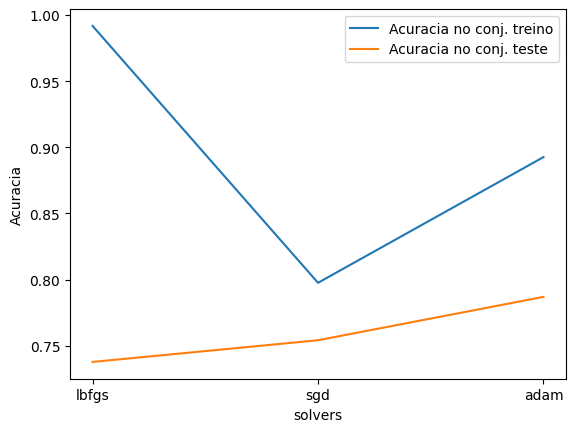

In [15]:
training_accuracy = []
test_accuracy = []

solvers = ['lbfgs', 'sgd', 'adam']

for solver in solvers:
  mlp = MLPClassifier(
    hidden_layer_sizes=(8, 2),
    activation='tanh',
    random_state=1,
    solver=solver
  ).fit(X_trainscaled, y_train)
  training_accuracy.append(mlp.score(X_trainscaled, y_train))
  test_accuracy.append(mlp.score(X_testscaled, y_test))

plt.plot(solvers, training_accuracy, label='Acuracia no conj. treino')
plt.plot(solvers, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('solvers')
plt.legend()

pd.DataFrame({"solvers": solvers, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

In [17]:
clf = MLPClassifier(
  hidden_layer_sizes=(8,2),
  activation="tanh",
  random_state=1,
  solver='adam'
).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.7868852459016393


/home/daniellucas/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
